<a href="https://colab.research.google.com/github/HowardXXXu/Bank-Prediction-Project/blob/main/Bank_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#data loading
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
#locate files and upload data
#https://drive.google.com/file/d/17S4SD0cmfmvlYlVkXAIyRtArVa60kwJ7/view?usp=sharing

id = "17S4SD0cmfmvlYlVkXAIyRtArVa60kwJ7"

file = drive.CreateFile({'id':id})
file.GetContentFile('bank.data.csv')

In [3]:
#load pandas/numpy and preview data

import numpy as np
import pandas as pd

churn_df = pd.read_csv('bank.data.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#raw view on dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#unique values check in column
churn_df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [6]:
#get target variable and checking for missing value
y = churn_df['Exited']

churn_df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [7]:
#Numerical feature
churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

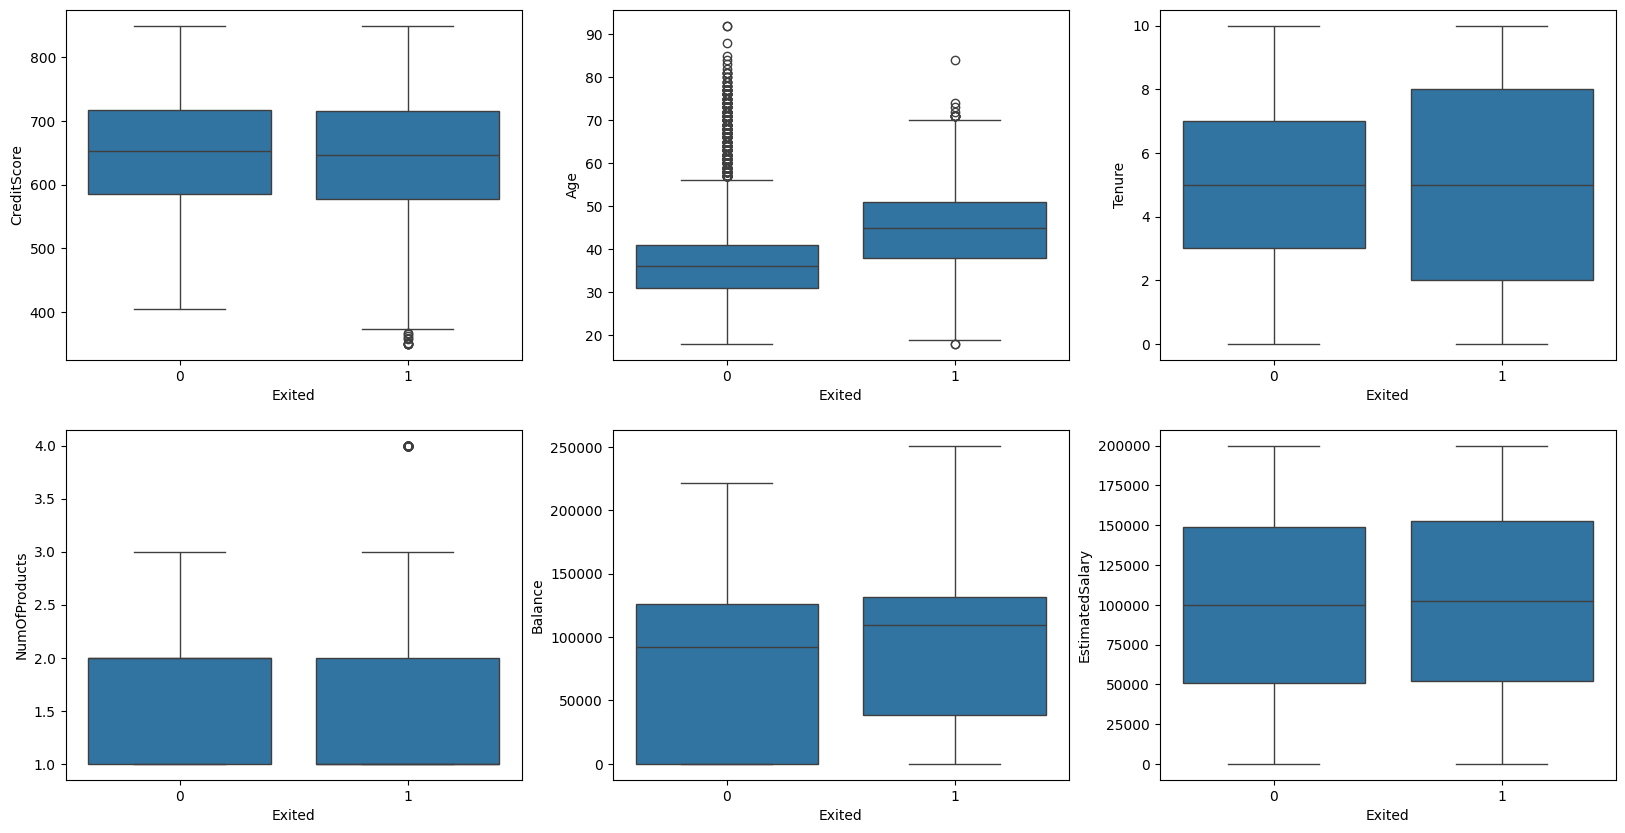

In [8]:
#Distribution check/ Data Visulized
import matplotlib.pyplot as plt
import seaborn as sns

_,axss = plt.subplots(2,3, figsize = [20, 10])
sns.boxplot(x = 'Exited', y = 'CreditScore', data = churn_df, ax = axss[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = churn_df, ax = axss[0][1])
sns.boxplot(x = 'Exited', y = 'Tenure', data = churn_df, ax = axss[0][2])
sns.boxplot(x = 'Exited', y = 'NumOfProducts', data = churn_df, ax = axss[1][0])
sns.boxplot(x = 'Exited', y = 'Balance', data = churn_df, ax = axss[1][1])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = churn_df, ax = axss[1][2])

<Axes: xlabel='Exited', ylabel='count'>

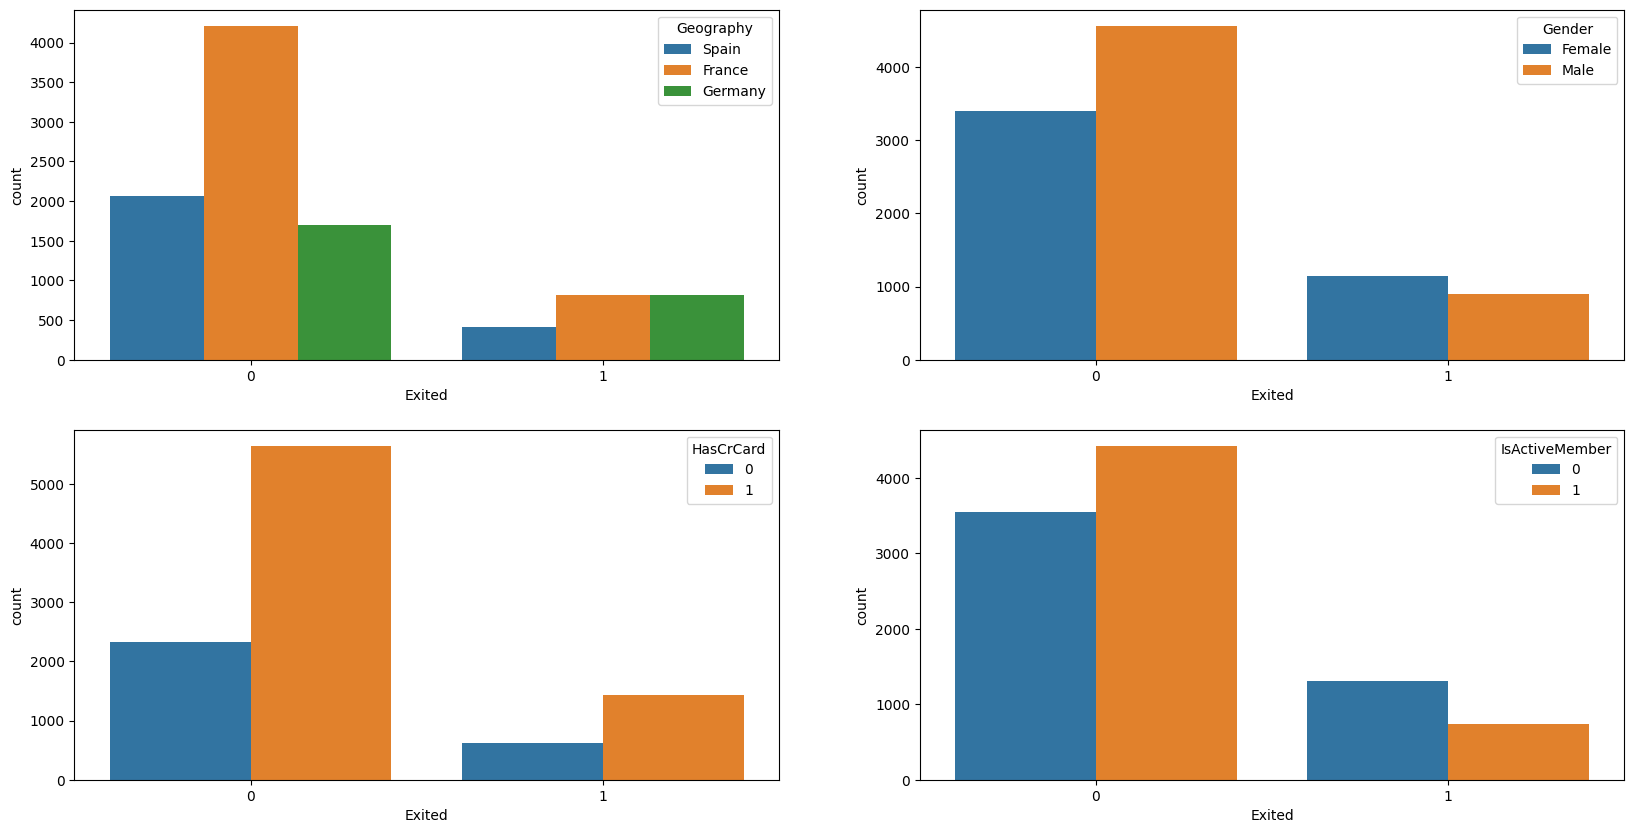

In [9]:
#categorical feature check, undersatnd dependency
_,axss = plt.subplots(2, 2 , figsize = [20,10])
sns.countplot(x = 'Exited', hue = 'Geography', data = churn_df, ax = axss[0][0])
sns.countplot(x = 'Exited', hue = 'Gender', data = churn_df, ax = axss[0][1])
sns.countplot(x = 'Exited', hue = 'HasCrCard', data = churn_df, ax = axss[1][0])
sns.countplot(x = 'Exited', hue = 'IsActiveMember', data = churn_df, ax = axss[1][1])

In [10]:
#determined independent features and drop
to_drop = ['RowNumber', 'CustomerId','Surname', 'Exited']
X = churn_df.drop(to_drop, axis = 1)

#check for drop success
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
#view dataset

In [12]:
#arrange
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes =='float64') | (X.dtypes == 'int64')]

In [13]:
cat_cols

Index(['Geography', 'Gender'], dtype='object')

In [14]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [15]:
#Using 75:25 splite data to training and testing, stratified sampling method used
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 1)

print('training data has ' + str(X_train.shape[0]) + 'datasets with' + str(X_train.shape[1]) + 'related features')
print('testing data has ' + str(X_test.shape[0]) + 'datasets with' + str(X_train.shape[1]) + 'related features')

training data has 7500datasets with10related features
testing data has 2500datasets with10related features


In [16]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7971,633,Spain,Male,42,10,0.00,1,0,1,79408.17
9152,708,Germany,Female,23,4,71433.08,1,1,0,103697.57
6732,548,France,Female,37,9,0.00,2,0,0,98029.58
902,645,France,Female,48,7,90612.34,1,1,1,149139.13
2996,729,Spain,Female,45,7,91091.06,2,1,0,71133.12


In [17]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns = enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [18]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,Male,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,Female,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,Female,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,Female,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,Female,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [19]:
#Gender transform to value
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_ord = OrdinalEncoder()
enc_ord.fit(X_train[categories])

X_train[categories] = enc_ord.transform(X_train[categories])
X_test[categories] = enc_ord.transform(X_test[categories])

X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,1.0,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,0.0,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,0.0,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,0.0,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,0.0,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [20]:
#Standardize Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.172985,1.0,0.289202,1.731199,-1.218916,-0.912769,-1.542199,0.968496,-0.352044,0.0,0.0,1.0
1,0.602407,0.0,-1.509319,-0.341156,-0.076977,-0.912769,0.648425,-1.032529,0.072315,0.0,1.0,0.0
2,-1.051762,0.0,-0.184093,1.385806,-1.218916,0.796109,-1.542199,-1.032529,-0.026711,1.0,0.0,0.0
3,-0.048922,0.0,0.857156,0.695022,0.229625,-0.912769,0.648425,0.968496,0.866221,1.0,0.0,0.0
4,0.819517,0.0,0.573179,0.695022,0.237278,0.796109,0.648425,-1.032529,-0.496617,0.0,0.0,1.0


Data preprocessing finished, starts to build model for training

In [21]:
#building Logistic Regression/K Nearest Neighbors/Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

classifier_logistic = LogisticRegression()
classifier_knn = KNeighborsClassifier()
classifier_rf = RandomForestClassifier()

In [22]:
#Model training
classifier_logistic.fit(X_train, y_train)
classifier_knn.fit(X_train, y_train)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
classifier_knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
classifier_rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
classifier_logistic.score(X_test, y_test)

0.808

In [27]:
classifier_knn.score(X_test, y_test)

0.8336

In [28]:
classifier_rf.score(X_test, y_test)

0.8584

In [29]:
#Random Forest has the highest score
#Using Grid Search to fin the best score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Define helper function to print the clear result for meassurement
def print_grid_search_metrics(gs):
  print("Best score is:" + str(gs.best_score_))
  print("Best parameters are:")
  best_parameters = gs.best_params_
  for param_name in sorted(best_parameters.keys()):
    print(param_name + ':' + str(best_parameters[param_name]))

parameters = {
    'n_estimators': [50,100,150,200],
    'max_depth': [1,2, 5,7,10],
}

Grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv = 5)
Grid_RF.fit(X_train, y_train)

print_grid_search_metrics(Grid_RF)

Best score is:0.8661333333333333
Best parameters are:
max_depth:10
n_estimators:200


In [30]:
best_RF_model = Grid_RF.best_estimator_
best_RF_model.score(X_test, y_test)

0.86

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#calculate the evaluation factors
def cal_evaluation(classifier, cm):
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)
  f1_score = 2 * precision * recall / (precision + recall)
  print('Accuracy: ' + str(accuracy))
  print('Precision: ' + str(precision))
  print('Recall: ' + str(recall))
  print('F1 Score: ' + str(f1_score))

def draw_confusion_matrix(confusion_matrix):
  class_names + ['Not','Churn']
  for cm in confusion_matrix:
    classifier, cm = cm[0], cm[1]
    cal_evaluation(classifier, cm)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#calculate the evaluation factors
def cal_evaluation(classifier, cm):
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)
  f1_score = 2 * precision * recall / (precision + recall)
  print('Accuracy: ' + str(accuracy))
  print('Precision: ' + str(precision))
  print('Recall: ' + str(recall))
  print('F1 Score: ' + str(f1_score))

def draw_confusion_matrix(confusion_matrix):
  class_names = ['Not','Churn'] #added missing assignment
  for cm in confusion_matrix:
    classifier, cm = cm[0], cm[1]
    cal_evaluation(classifier, cm)

In [32]:
  confusion_matrix = [
        ("Random Forest", confusion_matrix(y_test, best_RF_model.predict(X_test)))
  ] #added closing parenthesis
  draw_confusion_matrix(confusion_matrix)

Accuracy: 0.86
Precision: 0.8045977011494253
Recall: 0.412573673870334
F1 Score: 0.5454545454545455


In [33]:
#Roc Check
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred_rf = best_RF_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

best_RF_model.predict_proba(X_test)

array([[0.76349392, 0.23650608],
       [0.9358127 , 0.0641873 ],
       [0.76696716, 0.23303284],
       ...,
       [0.84708566, 0.15291434],
       [0.94222119, 0.05777881],
       [0.89543687, 0.10456313]])

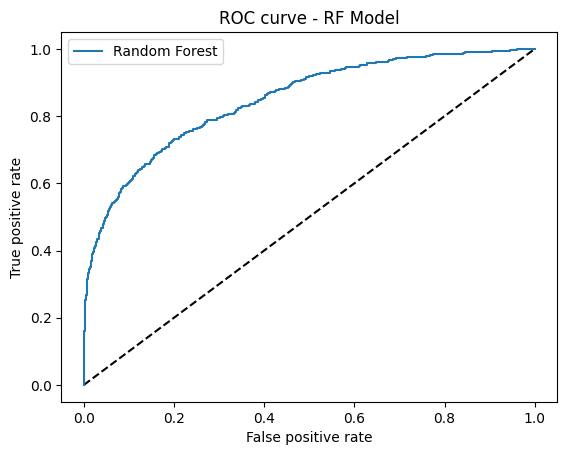

In [34]:
#Visuallize the reult
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF Model')
plt.legend(loc='best')
plt.show()

In [35]:
#AUC Score
from sklearn.metrics import roc_auc_score

print('AUC score:', roc_auc_score(y_test, y_pred_rf))

AUC score: 0.8477233996994333


In [36]:
X_RF = X.copy()

X_RF = OneHotEncoding(X_RF, enc_ohe,['Geography'])
X_RF['Gender'] = enc_ord.transform(X_RF[['Gender']])

X_RF.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [37]:
#Check Feature relvance
forest = RandomForestClassifier()
forest.fit(X_RF, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

#Check Feature relvance
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std

#Print out feature ranking
for ind in range(X.shape[1]):
  print ("{0}:{1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]],4)))

Age:0.2361
EstimatedSalary:0.1444
CreditScore:0.1446
Balance:0.1408
NumOfProducts:0.1353
Tenure:0.0813
IsActiveMember:0.0368
Geography_Germany:0.0243
Gender:0.0189
HasCrCard:0.0181
